In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import datetime

In [66]:
%reload_ext autoreload
%autoreload 2

DATA_DIRECTORY="C:/Users/David/OneDrive/UNC/honors thesis/ctdTURBO_data"
DATA_FILE_PATH=f"{DATA_DIRECTORY}/tests/20230629_1.csv"

In [67]:
data: pd.DataFrame = pd.read_csv(DATA_FILE_PATH)

In [68]:
dt_str = data["Date"] + " " + data[" Time"]
data["unix_time"] = ((pd.to_datetime(dt_str)) - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [69]:
# unix timestamps for time of entry and exit from buckets of varying sediment concentration.
uts: list[float] = [
    1688034146,
    1688034220,
    1688034290,
    1688034364,
    1688034406,
    1688034445,
    1688034464,
    1688034522,
    1688034561,
    1688034610
    ]

# turbs are for sediment concentrations determined by vacuum filtration or with a validated turbidity sensor.
turbs: list[float] = [
    0,
    10,
    30,
    80,
    200
    ]

In [70]:
data["Backscatter"] = data["Proximity"] - data["Ambient"]
cal_curve: pd.DataFrame = pd.DataFrame(columns=["Sed_conc", "Ambient", "Proximity", "Backscatter"])
n: int = 0
# turb_a: pd.DataFrame = data.loc[(data["unix_time"] >= 1688034146) & (data["unix_time"] <= 1688034183)]


while n < len(turbs):
    # subset = subset.astype({"Sed_conc": 'float', "Ambient": 'float', "Proximity": 'float', "Backscatter": 'float'})
    # subset["Ambient"] = subset["Ambient"].astype(float)
    # subset["Proximity"] = subset["Proximity"].astype(float)
    # subset["Backscatter"] = subset["Backscatter"].astype(float)
    subset = data.loc[(data["unix_time"] >= uts[2 * n]) & (data["unix_time"] <= uts[(2 * n) + 1])]
    subset = subset.astype({"Ambient":'float', "Proximity":'float', "Backscatter":'float'}) 

    cal_curve.loc[n] = [turbs[n], subset["Ambient"].mean(), subset["Proximity"].mean(), subset["Backscatter"].mean()]
    # if n == 0:
    #     cal_curve["Sed_conc"]
    # cal_curve["Sed_conc"].append(turbs[n])
    # prox: pd.Series = data.loc
    # cal_curve["Proximity"].append((data.loc[(data["unix_time"] >= uts[2 * n]) & (data["unix_time"] <= uts[(2 * n) + 1])])["Proximity"].mean())
    n += 1

Text(0, 0.5, 'Return')

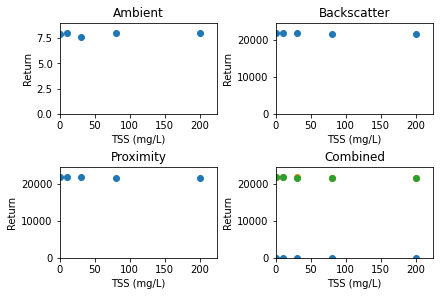

In [71]:
# fig, ax1 = plt.subplots()
# ax1.scatter(cal_curve["Sed_conc"], cal_curve["Ambient"])
fig, axd = plt.subplot_mosaic([['upleft', 'upright'],
                               ['lowleft', 'lowright']], constrained_layout = True)
axd['upleft'].set_title('Ambient')
axd['upleft'].scatter(cal_curve["Sed_conc"], cal_curve["Ambient"])
axd['upleft'].set_xlim(xmin=0, xmax = cal_curve["Sed_conc"].max() + (cal_curve["Sed_conc"].max() / 8))
axd['upleft'].set_ylim(ymin=0, ymax = cal_curve["Ambient"].max() + (cal_curve["Ambient"].max() / 8))
axd['upleft'].set_xlabel("TSS (mg/L)")
axd['upleft'].set_ylabel("Return")

axd['lowleft'].set_title('Proximity')
axd['lowleft'].scatter(cal_curve["Sed_conc"], cal_curve["Proximity"])
axd['lowleft'].set_xlim(xmin=0, xmax = cal_curve["Sed_conc"].max() + (cal_curve["Sed_conc"].max() / 8))
axd['lowleft'].set_ylim(ymin=0, ymax = cal_curve["Proximity"].max() + (cal_curve["Proximity"].max() / 8))
axd['lowleft'].set_xlabel("TSS (mg/L)")
axd['lowleft'].set_ylabel("Return")

axd['upright'].set_title('Backscatter')
axd['upright'].scatter(cal_curve["Sed_conc"], cal_curve["Backscatter"])
axd['upright'].set_xlim(xmin=0, xmax = cal_curve["Sed_conc"].max() + (cal_curve["Sed_conc"].max() / 8))
axd['upright'].set_ylim(ymin=0, ymax = cal_curve["Backscatter"].max() + (cal_curve["Backscatter"].max() / 8))
axd['upright'].set_xlabel("TSS (mg/L)")
axd['upright'].set_ylabel("Return")

axd['lowright'].set_title('Combined')
axd['lowright'].scatter(cal_curve["Sed_conc"], cal_curve["Ambient"])
axd['lowright'].scatter(cal_curve["Sed_conc"], cal_curve["Proximity"])
axd['lowright'].scatter(cal_curve["Sed_conc"], cal_curve["Backscatter"])
axd['lowright'].set_xlim(xmin=0, xmax = cal_curve["Sed_conc"].max() + (cal_curve["Sed_conc"].max() / 8))
axd['lowright'].set_ylim(ymin=0, ymax = (1.125 * max([cal_curve["Ambient"].max(), cal_curve["Proximity"].max(), cal_curve["Backscatter"].max()])))
axd['lowright'].set_xlabel("TSS (mg/L)")
axd['lowright'].set_ylabel("Return")